# Analysing the "Adverse Weather Scenarios for Future Electricity Systems" dataset, as part of the CIReN project.

## Petros Zantis
## May - July 2023

<font size="4">

* The purpose of this notebook is to analyse events in bulk (*i.e.* all **extremities** and all **global warming levels**)

    
* The user has the freedom to choose between event types, location, and classification (duration / severity)
    
    
* The user also has the option to select only *event1* of each category, or all events where applicable *(e.g. event 1, event 2, event 3)*
    
    
* A 2D contour plot is then shown for **average wind speed** and **average surface temperature**, across the 13 Polish wind farms
    * Each 'square' represents one event 
    * There are a total of 30 event categories (6 extremities * 5 global warming levels)
    
    
* A similar 2D contour plot is then shown for **percentage of low wind power generation**, 
    * Obtained by converting daily wind speed to power generated, and measuring days of the year where the total power is $<$ 100 MW (basically no significant power from the wind farms into the Polish network)
</font>


In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from myClasses import *

from netCDF4 import Dataset
import csv

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 15

%matplotlib inline

In [2]:
'''Data repository from CEDA'''

#dataset_loc = '.\\dap.ceda.ac.uk\\badc\\deposited2021\\adverse_met_scenarios_electricity\\data\\long_duration'

''' *** Change this string to your local dataset folder location *** '''

dataset_loc = 'C:\\Users\\pz61\\Box\\CIReN_Shared\\Task 2a - climate impacts\\Data'

# Details of the event of interest
event_types = [ 'summer_wind_drought', 'winter_wind_drought', 'summer_surplus_generation']
locations = ['europe', 'uk']
duration_severitys = ['duration' , 'severity']
global_warming_level = ['gwl4degC', 'gwl3degC', 'gwl2degC', 'gwl12-4degC', 'gwl12-2degC', '*']
event_nos = ['*', 'event1', 'event2', 'event3']

event_type = event_types[0]
location = locations[0]
extremity = '*'
duration_severity = duration_severitys[1]
global_warming_level = '*'
event_no = event_nos[1]

def select_events(event_type, location, extremity, duration_severity, global_warming_level, event_no):
    '''A function to interactively select the event of interest from the complete database'''
    
    file_str = dataset_loc
    if extremity == 'most_extreme_events' : global_warming_level =''
    details = [event_type, location, extremity, duration_severity, global_warming_level, event_no]
    for det in details:
        file_str = os.path.join(file_str, det).replace(os.sep, '\\')
    print("\nThe selected events are: {}".format(file_str))
    return os.path.join(file_str, '*.nc').replace(os.sep, '\\')

file_str = select_events(event_type, location, extremity, duration_severity, global_warming_level, event_no)


The selected events are: C:\Users\pz61\Box\CIReN_Shared\Task 2a - climate impacts\Data\summer_wind_drought\europe\*\severity\*\event1


In [3]:
print(file_str)

C:\Users\pz61\Box\CIReN_Shared\Task 2a - climate impacts\Data\summer_wind_drought\europe\*\severity\*\event1\*.nc


In [4]:
def create_events(file_str):
    '''A function to create Event instances for the imported events and add them in the Event_list 

        file_str (str) : the desired event file location
    '''
    
    print("Creating events:")
    Event_list = []
    try:
        filelist = glob.glob(file_str)
        
        for file in filelist:
            details = file.split('\\')[7:-1]               

            if len(Event_list)==0 or [*Event_list[-1].get_event_details().values()] != details:
                print(*details)
                Event_list.append(Event(*details))
            else:
                print("Not added again, it's the same event!")
                
    except IndexError as i: # or FileNotFoundError as f: 
        print(str(i))
        print("The file you asked for does not exist. Try checking the directory.")
        
    if len(Event_list)==0:
        print('No events match the requirements - try different parameters.')
               
    return Event_list
        
Events_list_unordered = create_events(file_str)

Creating events:
summer_wind_drought europe return_period_1_in_100_years severity gwl12degC event1
Not added again, it's the same event!
Not added again, it's the same event!
summer_wind_drought europe return_period_1_in_100_years severity gwl15degC event1
Not added again, it's the same event!
Not added again, it's the same event!
summer_wind_drought europe return_period_1_in_100_years severity gwl2degC event1
Not added again, it's the same event!
Not added again, it's the same event!
summer_wind_drought europe return_period_1_in_100_years severity gwl3degC event1
Not added again, it's the same event!
Not added again, it's the same event!
summer_wind_drought europe return_period_1_in_100_years severity gwl4degC event1
Not added again, it's the same event!
Not added again, it's the same event!
summer_wind_drought europe return_period_1_in_10_years severity gwl12degC event1
Not added again, it's the same event!
Not added again, it's the same event!
summer_wind_drought europe return_perio

In [5]:
'''Just checking if the right events were obtained, and sorting them by increasing extremity'''

extr_order = [2, 5, 10, 20, 50, 100]
gwl_order = [1.2, 1.5, 2, 3, 4]
Events_list = []

for extr in extr_order:    
    string = "return_period_1_in_" + str(extr) + "_years"
    for event in Events_list_unordered:
        if(event.extremity == string):
            Events_list.append(event)

for e in Events_list:
    print(e.extremity, e.global_warming_level, e.event_no)

return_period_1_in_2_years gwl12degC event1
return_period_1_in_2_years gwl15degC event1
return_period_1_in_2_years gwl2degC event1
return_period_1_in_2_years gwl3degC event1
return_period_1_in_2_years gwl4degC event1
return_period_1_in_5_years gwl12degC event1
return_period_1_in_5_years gwl15degC event1
return_period_1_in_5_years gwl2degC event1
return_period_1_in_5_years gwl3degC event1
return_period_1_in_5_years gwl4degC event1
return_period_1_in_10_years gwl12degC event1
return_period_1_in_10_years gwl15degC event1
return_period_1_in_10_years gwl2degC event1
return_period_1_in_10_years gwl3degC event1
return_period_1_in_10_years gwl4degC event1
return_period_1_in_20_years gwl12degC event1
return_period_1_in_20_years gwl15degC event1
return_period_1_in_20_years gwl2degC event1
return_period_1_in_20_years gwl3degC event1
return_period_1_in_20_years gwl4degC event1
return_period_1_in_50_years gwl12degC event1
return_period_1_in_50_years gwl15degC event1
return_period_1_in_50_years gwl2

In [6]:
def open_files(event_list, print_checks = False):
    '''A function to open the datasets from the .nc files and extract the quantities of interest, 
        and creates WeatherVariable instances to store the data and their details

        event_list (list of Events) : the list of Event instances created with create_events()
        print_checks (Bool) : a boolean to set if detailed checks are to be printed
    '''
        
    for event in event_list:
        details = event.get_event_details()
        file_str = dataset_loc
        for det in details:
            file_str = os.path.join(file_str, details[det]).replace(os.sep, '\\')
        file_str = os.path.join(file_str, '*.nc').replace(os.sep, '\\')
        
        try:
            filelist = glob.glob(file_str)
            data_lists = {}
            
            for file in filelist:
                
                dataset = Dataset(file ,mode='r')          
                var_str = list(dataset.variables.keys())[-1]

                lons = dataset.variables['longitude'][:]
                lats = dataset.variables['latitude'][:]
                gridded_lons, gridded_lats = np.meshgrid(lons,lats)

                time = dataset.variables['time'][:]
                variable = dataset.variables[var_str][:]  # data in shape [time,lat,lon]

                dataset.close()
                
                data_lists[var_str] = gridded_lons, gridded_lats, lons, lats, variable, time
                
                if print_checks:
                    # see the file inputs and netcdf dictionary keys to load:
                    print(file)
                    print("\nThe chosen file contains: {}".format(dataset.variables.keys()))
                    print("Longitude array shape: {}".format(lons.shape))
                    print("Latitude array shape: {}".format(lats.shape))
                    print("Time array shape: {}".format(time.shape))
                    print("Complete {} array shape: {}".format(var_str, variable.shape))

                    print("Minimum {} in data: {}".format(var_str, variable.min()))
                    print("Maximum {} in data: {}".format(var_str, variable.max()))
                    print()
                
            Wind = WeatherVariable('wind_speed', '100m Wind Speed', '(ms$^{-1}$)', plt.cm.RdBu_r, 'royalblue' )
            Temp = WeatherVariable('t2m', 'Surface Temperature', '($^{o}C$)', plt.cm.RdYlBu_r, 'darkorange' )
            Ssr = WeatherVariable('ssr', 'Net Surface Solar Radiation', '(W$s^{-2}$)', plt.cm.viridis, 'firebrick' )
            
            Wind.set_data(*data_lists[Wind.var])
            Temp.set_data(*data_lists[Temp.var])
            Temp.convert_to_C() 
            Ssr.set_data(*data_lists[Ssr.var])
            
            event.add_weather_variable(Wind)
            event.add_weather_variable(Temp)
            event.add_weather_variable(Ssr)
            
        except IndexError or FileNotFoundError: 
            print("The file you asked for does not exist. Try checking the directory.")
            
    if len(event_list)==0:
        print('No events match the requirements - try different parameters.')
        
open_files(Events_list)

In [7]:
''' Dictionary details:
Name : (Latitude, Longitude, No of wind turbines)
Maybe later add the specific turbine specs as well...
'''

Polish_Wind_Farms = {'Zary' : (51.69 , 15.10, 150),
                     'Nowy' : (52.24 , 16.29, 150),
                     'Lubiewo' : (53.97 , 16.35, 150),
                     'Zarki' : (51.11 , 16.47, 150),
                     'Gasawa' : (53.39 , 17.30, 150),
                     'Grabina' : (50.51 , 17.62, 150),
                     'Zarnowiec' : (53.08 , 18.52, 150),
                     'Suszec' : (50.35 , 18.78, 150),
                     'Laziska' : (50.13 , 19.71, 150),
                     'Paslek' : (53.80 , 19.93, 150), 
                     'Mszczonow' : (52.09 , 20.69, 150), 
                     'Mstow' : (50.97 , 20.78, 150), 
                     'Zoludowo' : (52.69 , 22.10, 150)}

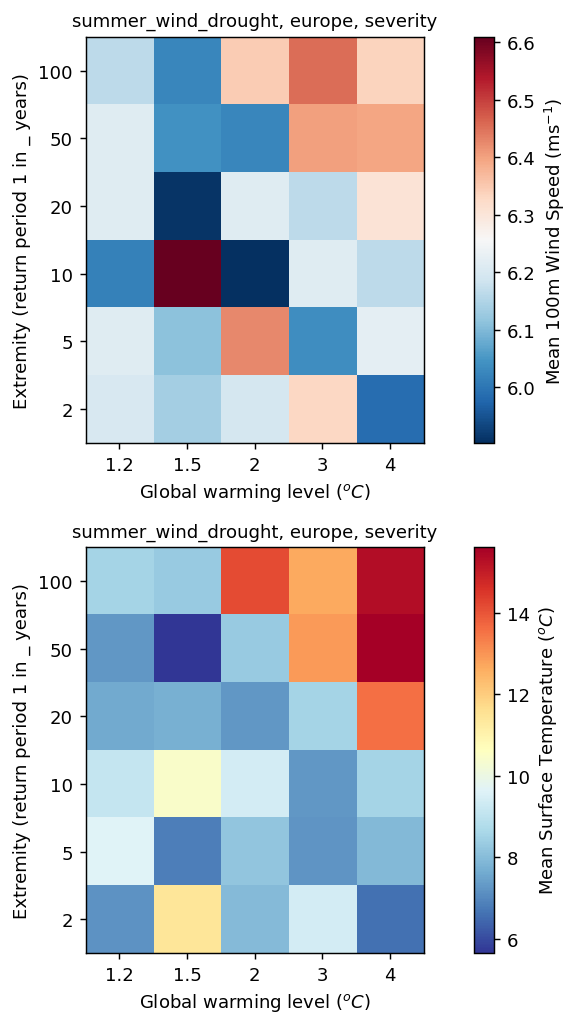

In [8]:

def extr_gwl_plot(Polish_Wind_Farms):

    plt.rcParams["font.size"] = 10
    fig, ax = plt.subplots(2,1,figsize=(8,8), facecolor='w', dpi=130)

    wind_temp = [[], []]
    event_avg = [[], []]

    xlabels, ylabels, cmaps, var_names = [],[],[],[]
    
    title = {} 
    
    for event in Events_list:
        if (list(title.values())[0:-1] == list(event.get_event_details().values())[0:-1]):  # check if events of the same type
            multiple_events = True            
        else:
            multiple_events = False
            event_avg = [[], []]
      
        title = event.get_event_details()
        #print([val for val in title.values()])
        #print(type(title.keys()))
        
        ylabel = "{}".format(title["Extremity"])
        ylabels.append(ylabel)
        xlabel = "{}".format(title["Global Warming Level"])
        xlabels.append(xlabel)
        
        for idx, weather_var in enumerate(event.weather_vars[0:2]): 
            
            var_details = weather_var.get_attributes()
            cmaps.append(var_details["Color map"])
            var_names.append(var_details["Name"] + " " + var_details["Units"])
            allfarms = []

            for wind_farm in Polish_Wind_Farms:

                lat,lon,turb_no = Polish_Wind_Farms[wind_farm]
                lat_idx, lon_idx, lat, lon = weather_var.find_location(lat, lon, printLoc=False)
                allfarms.append(weather_var.var_data[:,lat_idx, lon_idx].mean())
            
            allfarmsavg = np.array(allfarms).mean(axis=0)
            
            if multiple_events:
                if len(event_avg[idx]) == 0 : event_avg[idx].append(wind_temp[idx][-1])
                event_avg[idx].append(allfarmsavg)
                wind_temp[idx][-1] = np.array(event_avg[idx]).mean()
            else:
                wind_temp[idx].append(allfarmsavg)
    
    for i, var in enumerate(wind_temp[0:2]):
        var = np.array(var)
        im = ax[i].imshow(var.reshape(6,5), extent=[0, 5, 0 , 6], cmap=cmaps[i], origin='lower')
        ax[i].set_ylabel("Extremity (return period 1 in _ years)")
        ax[i].set_xlabel("Global warming level ($^{o}C$)")
        ax[i].set_yticks(np.arange(0.5,6,1))
        ax[i].set_xticks(np.arange(0.5,5,1))
        ax[i].set_yticklabels([str(e) for e in extr_order])
        ax[i].set_xticklabels([str(w) for w in gwl_order])
        ax[i].set_title("{}, {}, {}".format(title["Event type"], title["Location"], title["Duration/Severity"]), fontsize=10)
        cb = plt.colorbar(im, ax=ax[i], label= "Mean " +var_names[i])
    
    plt.tight_layout()
    plt.show()

extr_gwl_plot(Polish_Wind_Farms)


### The plots above show the expected trend: as g.w.l and extremities increase, the average surface temperature increases as well. It seems that wind speeds show a similar trend, with some outliers.

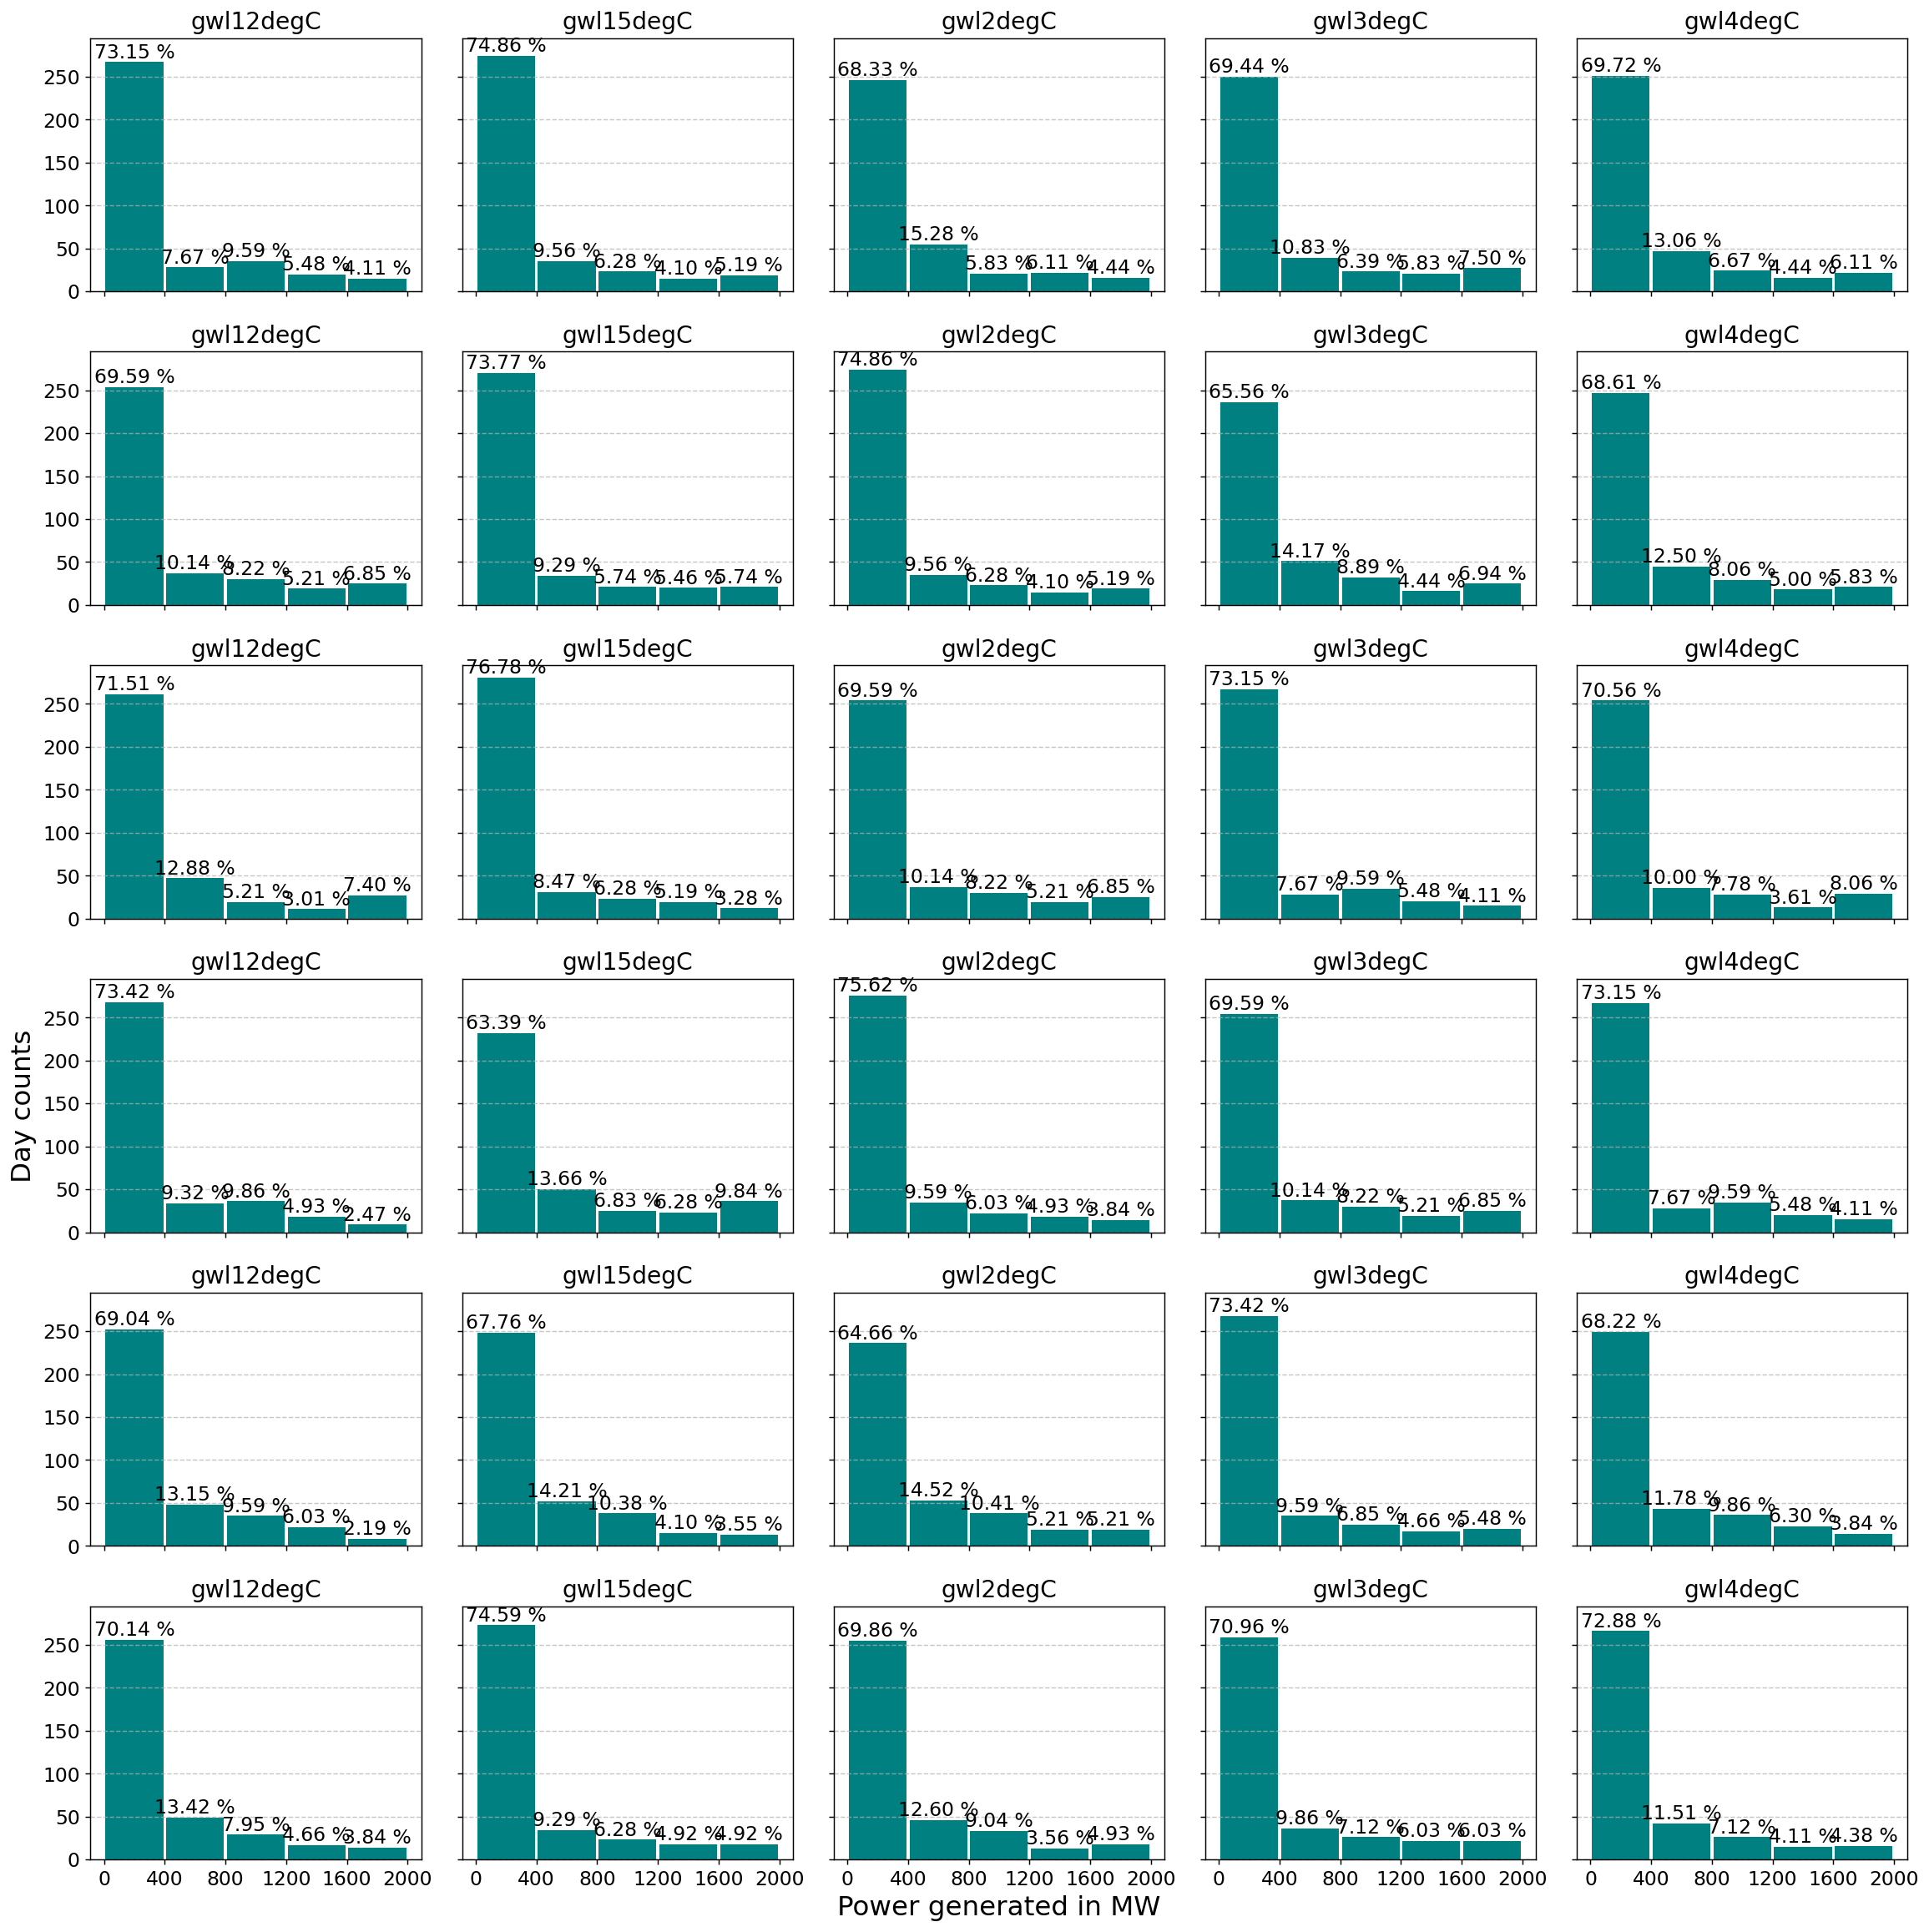

In [9]:
def compare_events_powers(Polish_Wind_Farms):
    
    plt.rcParams["font.size"] = 13
    fig, ax = plt.subplots(6,5, figsize=(18,18), facecolor='w', dpi=130, sharex=True, sharey=True)

    for event_idx, event in enumerate(Events_list):
        title = event.get_event_details()
        #print([val for val in title.values()])  # to identify which event
        
        row = 5 - int(event_idx/5)
        col = event_idx%5
        
        wind_powers = []
        xlabels, ylabels, units, clrs = [],[],[],[] 

        wind = event.weather_vars[0]  

        for wind_farm in Polish_Wind_Farms:

            lat,lon,turb_no = Polish_Wind_Farms[wind_farm]                 
            date_conv, wind_speeds, lat, lon = wind.get_var_time_data(lat, lon, printLoc=False)
            
            farm_power = turb_no * WindTurbine().wind_power(wind_speeds.flatten())
            wind_powers.append(farm_power)  # convert wind speed to power

        
        # quick way to add power labels before ssr labels
        ylabels.insert(2, 'Power generated in MW')  # DO TEMP AS WELL
        clrs.insert(2, 'teal') 
        units.insert(2, 'MW')
        
#         print(np.array(wind_powers).shape)
        
        wind_powers = (np.array(wind_powers).sum(axis=0))/1e6  # wind power sum across Polish Wind farms, in MW
        
        i,j = row, col
        
        ax[i,j].set_title(title["Global Warming Level"])

        bins = np.linspace(0, 2000, 6)
        hist = ax[i,j].hist(wind_powers, bins=bins, color='teal', rwidth=0.95)
       
        ax[i,j].grid(axis='y',linestyle='--',alpha=0.7)
        ax[i,j].set_xticks(bins)
        counts = hist[0]
        percentages = counts/np.sum(counts) *100

        for b in range(len(bins)-1):
            patch = hist[2].patches[b]
            ax[i,j].annotate('{:.2f} %'.format(percentages[b]), (patch.get_x() + patch.get_width()/2, patch.get_height()), 
                           fontsize=13, ha='center', va='bottom')
    
    ax[5,2].set_xlabel('Power generated in MW', fontsize=18)
    ax[3,0].set_ylabel('Day counts', fontsize=18)         
    plt.tight_layout()
    plt.show()

compare_events_powers(Polish_Wind_Farms)

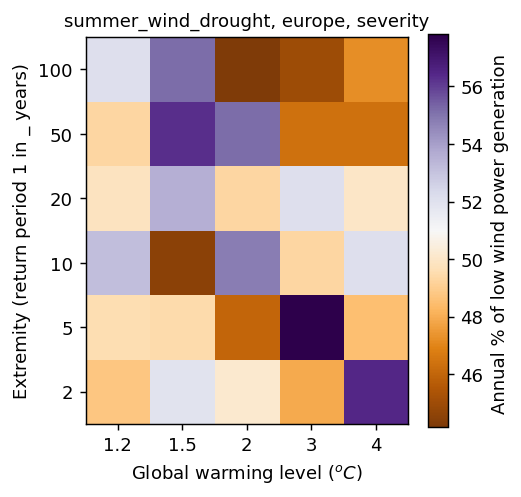

In [10]:

def extr_gwl_power_plot(Polish_Wind_Farms):

    plt.rcParams["font.size"] = 10
    fig, ax = plt.subplots(1,1,figsize=(4,4), facecolor='w', dpi=130)

    wind_powers = []
    event_avg = []    
    title = {} 
    
    for event in Events_list:
        if (list(title.values())[0:-1] == list(event.get_event_details().values())[0:-1]):  # check if events of the same type
            multiple_events = True            
        else:
            multiple_events = False
            event_avg = []
      
        title = event.get_event_details()
        #print([val for val in title.values()])
        #print(type(title.keys()))
        
        ylabel = "{}".format(title["Extremity"])
        xlabel = "{}".format(title["Global Warming Level"])
        
        Wind = event.weather_vars[0]
        allfarms = []
            
        for wind_farm in Polish_Wind_Farms:

            lat,lon,turb_no = Polish_Wind_Farms[wind_farm]                 
            date_conv, wind_speeds, lat, lon = Wind.get_var_time_data(lat, lon, printLoc=False)
            
            farm_power = turb_no * WindTurbine().wind_power(wind_speeds.flatten())  # convert wind speed to power
            allfarms.append(farm_power)  

        allfarmssum = (np.array(allfarms).sum(axis=0))/1e6  # wind power sum across Polish Wind farms, in MW
        
        power_threshold = 100  # MW
        low_power = np.where(allfarmssum < power_threshold)[0]
        low_perc = 100*(len(low_power)/len(allfarmssum))

        if multiple_events:
            if len(event_avg) == 0 : event_avg.append(wind_powers[-1])
            event_avg.append(low_perc)
            wind_powers[-1] = low_perc
        else:
            wind_powers.append(low_perc)
        
    wind_powers = np.array(wind_powers)
    im = ax.imshow(wind_powers.reshape(6,5), extent=[0, 5, 0 , 6], cmap='PuOr', origin='lower')
    ax.set_ylabel("Extremity (return period 1 in _ years)")
    ax.set_xlabel("Global warming level ($^{o}C$)")
    ax.set_yticks(np.arange(0.5,6,1))
    ax.set_xticks(np.arange(0.5,5,1))
    ax.set_yticklabels([str(e) for e in extr_order])
    ax.set_xticklabels([str(w) for w in gwl_order])
    ax.set_title("{}, {}, {}".format(title["Event type"], title["Location"], title["Duration/Severity"]), fontsize=10)
    cb = plt.colorbar(im, ax=ax, label= "Annual % of low wind power generation ")

    plt.show()

extr_gwl_power_plot(Polish_Wind_Farms)

### The plot above seems to be very similar to the average wind speed plot. It looks like as g.w.l. and extremities increase, there are fewer days of the year with significant wind droughts